In [1]:
from tda_helper import *
import torch
from torch.utils.data import TensorDataset
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

torch.set_printoptions(precision=6)

### Input dataset

In [2]:
### Uniform random

# N = int(1e2)
# data = torch.rand(N, 2)


### Line segment

# N = int(1e2)
# x = torch.rand(N)
# y = x + 0.1 * torch.randn(x.shape)
# data = torch.stack([x, y], axis=1)


### Regular circle

# N = int(1e2)
# theta = torch.linspace(0, 2*np.pi, N)
# data = torch.stack([torch.cos(theta), torch.sin(theta)], axis=1)
# data = data + 0.01 * torch.randn(data.shape)


### Regular square grid

# N = 10
# x, y = torch.meshgrid([torch.linspace(0, 1, N), torch.linspace(0, 1, N)])
# x = x + 0.01*torch.randn(x.shape)
# y = y + 0.01*torch.randn(y.shape)
# data = torch.stack([x.flatten(), y.flatten()], axis=1)


### Ring
N = int(1e2)
theta = torch.linspace(0, 2*np.pi, N)
x = torch.cos(theta)
y = torch.sin(theta)
r = 0.5 + 0.2 * torch.rand(x.shape)
data = torch.stack([r*x, r*y], axis=1)
data = data + 0.01 * torch.randn(data.shape)


### Normalization
data = (data-torch.mean(data, axis=0)) / torch.std(data, axis=0)

### Initialize neural network model

In [3]:
config_layers = {
    'input_size': data.shape[1],
    'hidden_size': 128,
    'n_layers': 2,
    'output_size': 2,
    'activation': 'ReLU',
    'bias': True,
}

use_cuda = False
lr = 0.01
tol = 1e-6
batch_size = data.shape[0]

HOMOLOGY_DIM = 1

model = FeedForwardHom(config_layers, 
                       tol=tol,
                       lr=lr,
                       batch_size=batch_size,
                       use_cuda=use_cuda,
                       target_penalty=1.0,
                       homology_penalty=0.0,
                       norm=2,
                      )

### Fit the input point cloud

Epoch : 1/50: 100%|████| 1.00/1.00 [00:00<00:00, 161it/s, homology=0, compactness=2.69, target=1.18]
Epoch : 2/50: 100%|███| 1.00/1.00 [00:00<00:00, 255it/s, homology=0, compactness=3.69, target=0.669]
Epoch : 3/50: 100%|███| 1.00/1.00 [00:00<00:00, 256it/s, homology=0, compactness=6.79, target=0.312]
Epoch : 4/50: 100%|██| 1.00/1.00 [00:00<00:00, 151it/s, homology=0, compactness=10.1, target=0.0999]
Epoch : 5/50: 100%|██| 1.00/1.00 [00:00<00:00, 156it/s, homology=0, compactness=13.3, target=0.0164]
Epoch : 6/50: 100%|██| 1.00/1.00 [00:00<00:00, 192it/s, homology=0, compactness=16.1, target=0.0318]
Epoch : 7/50: 100%|███| 1.00/1.00 [00:00<00:00, 135it/s, homology=0, compactness=18.3, target=0.099]
Epoch : 8/50: 100%|███| 1.00/1.00 [00:00<00:00, 109it/s, homology=0, compactness=19.7, target=0.166]
Epoch : 9/50: 100%|███| 1.00/1.00 [00:00<00:00, 259it/s, homology=0, compactness=20.2, target=0.201]
Epoch : 10/50: 100%|██| 1.00/1.00 [00:00<00:00, 159it/s, homology=0, compactness=20.1, targ

Deprecated parameter. It has been replaced by max_intervals


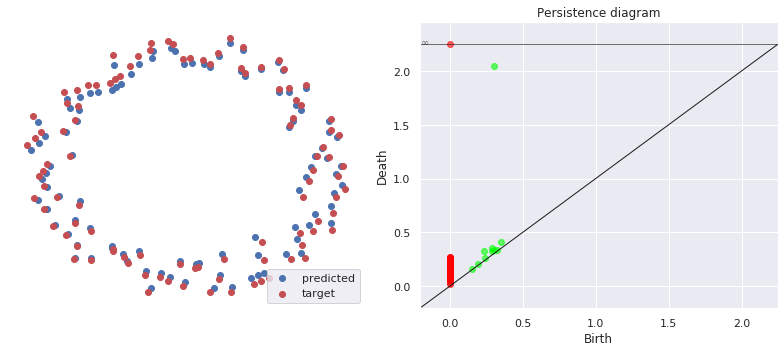

In [4]:
model.train(TensorDataset(data, data), 50)
model_origin = model

y = model.nn(data).cpu().data

fig, axes = plt.subplots(figsize=(11, 5), nrows=1, ncols=2)

ax = axes[0]
ax.scatter(y[:, 0], y[:, 1], color='b', label='predicted')
ax.scatter(data[:, 0], data[:, 1], color='r', label='target')
ax.legend(loc='lower right')
ax.axis('off')

ax = axes[1]
rips_complex = gd.RipsComplex(y, max_edge_length=np.inf)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=HOMOLOGY_DIM+1)
dgm = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
gd.plot_persistence_diagram(dgm)

plt.tight_layout()
plt.show()

### Transform the input point cloud to minimize 1-homology

Epoch : 1/5: 100%|█| 1.00/1.00 [00:01<00:00, 1.40s/it, homology=1.83, compactness=13.6, target=0.00186]
Epoch : 2/5: 100%|█| 1.00/1.00 [00:01<00:00, 1.36s/it, homology=1.82, compactness=14, target=0.00842]
Epoch : 3/5: 100%|█| 1.00/1.00 [00:01<00:00, 1.37s/it, homology=1.64, compactness=14.6, target=0.0477]
Epoch : 4/5: 100%|█| 1.00/1.00 [00:01<00:00, 1.38s/it, homology=1.73, compactness=15.7, target=0.148]
Epoch : 5/5: 100%|█| 1.00/1.00 [00:01<00:00, 1.27s/it, homology=0.891, compactness=17.2, target=0.338]


Deprecated parameter. It has been replaced by max_intervals


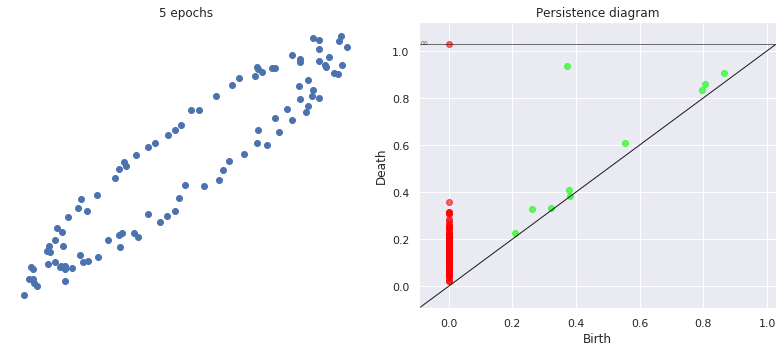

Epoch : 1/5: 100%|█| 1.00/1.00 [00:01<00:00, 1.37s/it, homology=0.863, compactness=19.1, target=0.621]
Epoch : 2/5: 100%|█| 1.00/1.00 [00:01<00:00, 1.38s/it, homology=0.332, compactness=21.2, target=1.01]
Epoch : 3/5: 100%|█| 1.00/1.00 [00:01<00:00, 1.38s/it, homology=0.179, compactness=23.3, target=1.47]
Epoch : 4/5: 100%|█| 1.00/1.00 [00:01<00:00, 1.36s/it, homology=0.336, compactness=25.5, target=1.95]
Epoch : 5/5: 100%|█| 1.00/1.00 [00:01<00:00, 1.39s/it, homology=0.584, compactness=27.5, target=2.42]


Deprecated parameter. It has been replaced by max_intervals


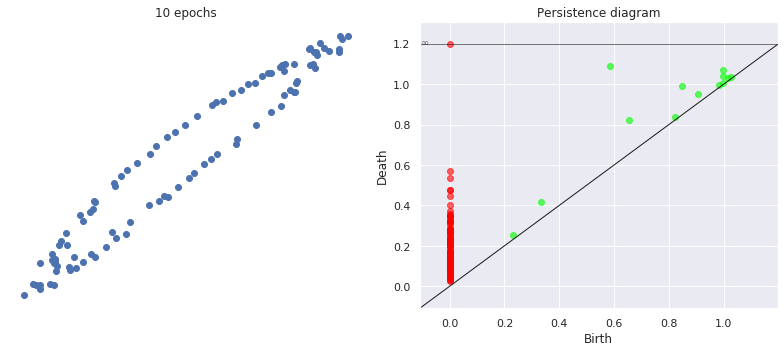

Epoch : 1/5: 100%|█| 1.00/1.00 [00:01<00:00, 1.38s/it, homology=0.374, compactness=29.7, target=2.88]
Epoch : 2/5: 100%|█| 1.00/1.00 [00:01<00:00, 1.36s/it, homology=0.574, compactness=31.7, target=3.33]
Epoch : 3/5: 100%|█| 1.00/1.00 [00:01<00:00, 1.32s/it, homology=0.401, compactness=33.8, target=3.79]
Epoch : 4/5: 100%|█| 1.00/1.00 [00:01<00:00, 1.33s/it, homology=0.357, compactness=35.8, target=4.26]
Epoch : 5/5: 100%|█| 1.00/1.00 [00:01<00:00, 1.32s/it, homology=0.291, compactness=37.8, target=4.73]


Deprecated parameter. It has been replaced by max_intervals


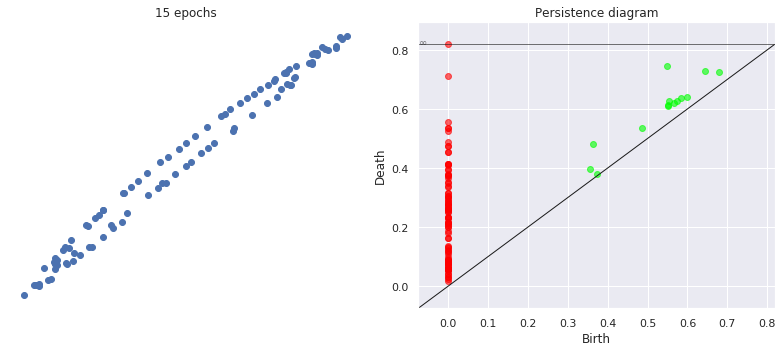

In [5]:
model = model_origin

model.homology_dim = HOMOLOGY_DIM
model.homology_eps = 0.01
model.homology_penalty = 1.0
model.normalize_for_homology = 'std'
model.target_penalty = 0.0
model.compactness_penalty = 0.0

for k in range(3):
    model.train(TensorDataset(data, data), 5)
    
    y = model.nn(data).cpu().data
    
    fig, axes = plt.subplots(figsize=(11, 5), nrows=1, ncols=2)    

    ax = axes[0]
    ax.scatter(y[:, 0], y[:, 1])
    ax.set_title('{} epochs'.format(5*(k+1)))
    ax.axis('off')
    
    ax = axes[1]
    rips_complex = gd.RipsComplex(y, max_edge_length=np.inf)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=HOMOLOGY_DIM+1)
    dgm = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0)
    gd.plot_persistence_diagram(dgm)

    plt.tight_layout()
    plt.show()